<center>
<h1>Skin Cancer Detection Model</h1>
<h2>J-Component - Soft Computing</h2>
<p>Made under the guidance of <b>Dr. Agilandeeswari L</b><br>
</center>
By:<br>
Aashish Bansal 19BIT0346<br>
Keerthi Yasasvi 19BIT03<br>
Perumalla Sasank 19BIT03<br>
</p>


<h1>Importing all the Required Libraries</h1>

In [ ]:
import numpy as np 
import pandas as pd
import os 
import cv2
import matplotlib.pyplot as plt 
import os
from PIL import Image
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from keras.utils import np_utils
from tensorflow.python.keras.layers import Dense,Conv2D,Flatten,MaxPooling2D,GlobalAveragePooling2D,Activation,BatchNormalization,Dropout
from tensorflow.python.keras import Sequential,backend,optimizers

<h1>Accessing Google Drive to Import Dataset</h1>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


unzipping the imported datasets

In [ ]:
#

In [ ]:
!pip install patool
import patoolib
patoolib.extract_archive("/content/drive/MyDrive/dataset/Malignant & Benign archive (1)/Malignant & Benign archive (1).zip", outdir="/content")
#/content/drive/MyDrive/dataset/Malignant & Benign archive (1)/Malignant & Benign archive (1).zip

     |████████████████████████████████| 81kB 9.5MB/s 
patool: Extracting /content/drive/MyDrive/dataset/Malignant & Benign archive (1)/Malignant & Benign archive (1).zip ...
patool: running /usr/bin/7z x -o/content -- "/content/drive/MyDrive/dataset/Malignant & Benign archive (1)/Malignant & Benign archive (1).zip"
patool: ... /content/drive/MyDrive/dataset/Malignant & Benign archive (1)/Malignant & Benign archive (1).zip extracted to `/content'.


'/content'

In [ ]:
#Imageprocessing to train model by Converting Images to Array

In [ ]:
malignant_data = os.listdir('/content/drive/MyDrive/dataset/Malignant & Benign archive (1)/train/malignant')
benign_data = os.listdir('/content/drive/MyDrive/dataset/Malignant & Benign archive (1)/train/benign')
data = []
labels = []

for img in malignant_data:
    try:
        img_read = plt.imread('/content/drive/MyDrive/dataset/Malignant & Benign archive (1)/train/malignant/' + img)
        img_resize = cv2.resize(img_read, (224, 224))
        img_array = img_to_array(img_resize)
        data.append(img_array)
        labels.append(1)
    except:
        None
        
for img in benign_data:
    try:
        img_read = plt.imread('/content/drive/MyDrive/dataset/Malignant & Benign archive (1)/train/benign/' + img)
        img_resize = cv2.resize(img_read, (224, 224))
        img_array = img_to_array(img_resize)
        data.append(img_array)
        labels.append(0)
    except:
        None

image_data = np.array(data)
labels = np.array(labels)
print("image_data:",len(labels))
print("labels:",len(labels))

image_data: 2637
labels: 2637


In [ ]:
# Data Visualization

Malignant Sample:



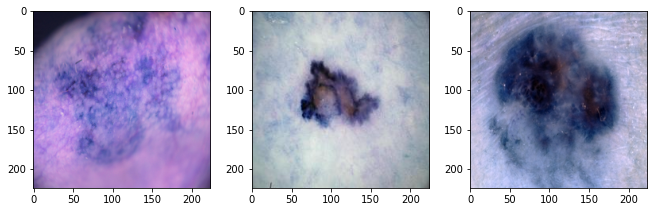

Benign Sample:



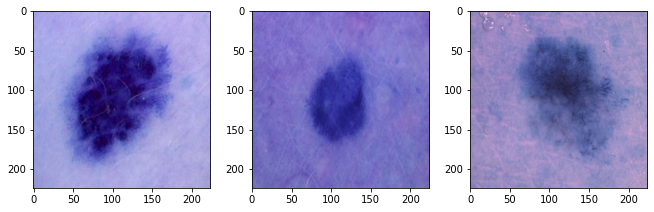

In [ ]:
print("Malignant Sample:\n")
plt.figure(figsize = (15,15))
for i in range(3):
    plt.subplot(4, 4, i+1)
    img = cv2.imread('/content/drive/MyDrive/dataset/Malignant & Benign archive (1)/train/malignant/'+ malignant_data[i])
    plt.imshow(img)
plt.show()

print("Benign Sample:\n")
plt.figure(figsize = (15,15))
for i in range(3):
    plt.subplot(4, 4, i+1)
    img = cv2.imread('/content/drive/MyDrive/dataset/Malignant & Benign archive (1)/train/benign/'+ benign_data[i])
    plt.imshow(img)
plt.show()

In [ ]:
# Dividng into train and test

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(image_data, labels, test_size = 0.2,random_state = 0)

y_train = np_utils.to_categorical(y_train, num_classes = 2)
y_test = np_utils.to_categorical(y_test, num_classes = 2)

print("X_train:",len(X_train))
print("X_test:",len(X_test))
print("y_train:",len(y_train))
print("y_test:",len(y_test))

X_train: 2109
X_test: 528
y_train: 2109
y_test: 528


In [ ]:
# Building the CNN model

In [ ]:
model = Sequential()
    
inputShape = (224, 224, 3)

if backend.image_data_format() == 'channels_first':
          inputShape = (3, 224, 224)
model.add(Conv2D(128, (3,3), activation = 'relu', input_shape = inputShape))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization(axis = -1))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization(axis = -1))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization(axis = -1))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization(axis = -1))
model.add(Dropout(0.2))

model.add(Flatten())
    
model.add(Dense(512, activation = 'relu'))
model.add(BatchNormalization(axis = -1))
model.add(Dropout(0.5))
model.add(Dense(2, activation = 'softmax'))
    
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 128)     3584      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 128)     0         
_________________________________________________________________
batch_normalization (BatchNo (None, 111, 111, 128)     512       
_________________________________________________________________
dropout (Dropout)            (None, 111, 111, 128)     0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 128)     147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 128)       0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 54, 54, 128)       5

In [ ]:
# Compiling the model

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
# Fitting the model

In [ ]:
model.fit(X_train, y_train, epochs = 120, batch_size = 32)

Epoch 1/120
66/66 [==============================] - 48s 188ms/step - loss: 1.1223 - accuracy: 0.6984
Epoch 2/120
66/66 [==============================] - 10s 149ms/step - loss: 0.5224 - accuracy: 0.7663
Epoch 3/120
66/66 [==============================] - 10s 148ms/step - loss: 0.4518 - accuracy: 0.7938
Epoch 4/120
66/66 [==============================] - 10s 149ms/step - loss: 0.3814 - accuracy: 0.8336
Epoch 5/120
66/66 [==============================] - 10s 150ms/step - loss: 0.3596 - accuracy: 0.8316
Epoch 6/120
66/66 [==============================] - 10s 151ms/step - loss: 0.3417 - accuracy: 0.8445
Epoch 7/120
66/66 [==============================] - 10s 151ms/step - loss: 0.3392 - accuracy: 0.8439
Epoch 8/120
66/66 [==============================] - 10s 153ms/step - loss: 0.3712 - accuracy: 0.8367
Epoch 9/120
66/66 [==============================] - 10s 153ms/step - loss: 0.3046 - accuracy: 0.8694
Epoch 10/120
66/66 [==============================] - 10s 154ms/step - loss: 0.291

In [ ]:
# Evaluating the model

In [ ]:
predict = model.evaluate(X_test, y_test)
print("Loss: ",predict[0])
print("Accuracy: ",predict[1]*100)

17/17 [==============================] - 2s 97ms/step - loss: 0.9453 - accuracy: 0.8277
Loss:  0.9452693462371826
Accuracy:  82.76515007019043


In [ ]:
# importing libraries

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from numpy import *
from tkinter import *
from PIL import ImageTk, Image 
import matplotlib.pylab as plt 

In [ ]:
# Testing images

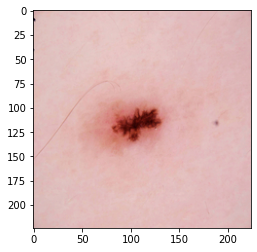

In [ ]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('/content/drive/MyDrive/dataset/Malignant & Benign archive (1)/test/benign/1.jpg', target_size = (224, 224, 3))
imgplot = plt.imshow(test_image)
test_image=image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
result=ndarray.round(result)

In [ ]:
print(result)

[[0. 1.]]


In [ ]:
if result[0][0] == 1:
  prediction = 'benign'
else:
  prediction = 'malignant'

In [ ]:
print(prediction)

malignant


In [ ]:
# Saving the model

In [ ]:
%cd "/content/drive/MyDrive/dataset/Malignant & Benign archive (1)/Testing Results Saved/"
model.save('skin_cancer_3005.h5')
from tensorflow.keras.models import load_model
model = load_model('skin_cancer_3005.h5')
model.summary()

/content/drive/MyDrive/dataset/Malignant & Benign archive (1)/Testing Results Saved
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 128)     3584      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 128)     0         
_________________________________________________________________
batch_normalization (BatchNo (None, 111, 111, 128)     512       
_________________________________________________________________
dropout (Dropout)            (None, 111, 111, 128)     0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 128)     147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 128)       0         
______________________________________

In [ ]:
#coverting trained .h5 model to .tflite model for mobile application

In [ ]:
import tensorflow as tf

model = tf.keras.models.load_model('/content/drive/MyDrive/dataset/Malignant & Benign archive (1)/Testing Results Saved/skin_cancer_3005.h5')
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
open("converted_model.tflite", "wb").write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpv7dhnna7/assets


39555832